In [1]:
!python --version

Python 3.10.14


In [3]:
# 패키지 설치
# -q => 세부사항 보여주지 않고 설치
!pip install cx_Oracle -q

In [17]:
!pip list

Package                   Version
------------------------- -----------
anyio                     4.2.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
beautifulsoup4            4.12.2
bleach                    4.1.0
Bottleneck                1.3.7
Brotli                    1.0.9
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
cx-Oracle                 8.3.0
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.16.2
fonttools                 4.51.0
idna                      3.7
ipykernel                 6.28.0
ipython              

In [14]:
!pip install plot

     ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
     -------------------- ------------------- 41.0/78.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 78.6/78.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/135.1 kB ? eta -:--:--
   ---------------------------------------- 135.1/135.1 kB 7.8 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26327 sha256=5024a43883a277c5500793f591c9fdf178cb90edd6b81a63bb813ffa0c119e02
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\7c\d0\9e\1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [45]:
# 데이터프레임으로 불러오기
import cx_Oracle
import pandas as pd

# 데이터베이스 연결
# 사용자이름/비밀번호/호스트이름:포트:SID => oracle 접속과 같은 형태
con = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")
# 데이터베이스와의 상호작용을 위한 커서를 생성

#  하나의 DB connection에 대하여 독립적으로 SQL 문을 실행할 수 있는 작업환경을 제공하는 객체.
# 하나의 connection에 동시에 한개의 cursor만 생성가능
# cursor를 통해서 SQL 문을 실행할 수 있으며, 응용 프로그램이 실행결과를 투플 단위로 접근할 수 있도록함

cur = con.cursor()
# employees 테이블의 모든 데이터를 선택하는 쿼리를 실행
# execute()는 단일 SQL 문만 실행
cur.execute('select * from EMPLOYEES')
# 쿼리 결과를 모두 가져와 res 변수에 저장
# 모든 데이타를 한꺼번에 클라이언트로 가져올 때 사용(fetchall) -> tuple형식으로 저장
res = cur.fetchall()
# 데이터를 데이터프레임으로 변환
df = pd.DataFrame(res)
df

,0,1,2,3,4,5,6,7,8,9,10
0,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600.0,NaN,124.0,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600.0,NaN,124.0,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400.0,NaN,101.0,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000.0,NaN,100.0,20.0
4,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
102,193,Britney,Everett,BEVERETT,650.501.2876,2005-03-03,SH_CLERK,3900.0,NaN,123.0,50.0
103,194,Samuel,McCain,SMCCAIN,650.501.3876,2006-07-01,SH_CLERK,3200.0,NaN,123.0,50.0
104,195,Vance,Jones,VJONES,650.501.4876,2007-03-17,SH_CLERK,2800.0,NaN,123.0,50.0
105,196,Alana,Walsh,AWALSH,650.507.9811,2006-04-24,SH_CLERK,3100.0,NaN,124.0,50.0


In [46]:
# employees 테이블의 컬럼 이름을 조회하는 쿼리를 실행
cur.execute("select column_name from user_tab_columns where table_name = 'EMPLOYEES'")
# 컬럼 이름 결과를 모두 가져와 col 변수에 저장
col = cur.fetchall()

# 컬럼 이름 리스트 생성
li = []
for i in col:
    for j in i:
        li.append(j)
# 데이터프레임 컬럼 이름 설정
df.columns = li
print(df.head())
# 커서를 닫는다
cur.close()
# 데이터베이스 연결을 닫는다
con.close()

   EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          198     Donald   OConnell  DOCONNEL  650.507.9833 2007-06-21   
1          199    Douglas      Grant    DGRANT  650.507.9844 2008-01-13   
2          200   Jennifer     Whalen   JWHALEN  515.123.4444 2003-09-17   
3          201    Michael  Hartstein  MHARTSTE  515.123.5555 2004-02-17   
4          202        Pat        Fay      PFAY  603.123.6666 2005-08-17   

     JOB_ID   SALARY  COMMISSION_PCT  MANAGER_ID  DEPARTMENT_ID  
0  SH_CLERK   2600.0             NaN       124.0           50.0  
1  SH_CLERK   2600.0             NaN       124.0           50.0  
2   AD_ASST   4400.0             NaN       101.0           10.0  
3    MK_MAN  13000.0             NaN       100.0           20.0  
4    MK_REP   6000.0             NaN       201.0           20.0  


In [47]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600.0,NaN,124.0,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600.0,NaN,124.0,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400.0,NaN,101.0,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000.0,NaN,100.0,20.0
4,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000.0,NaN,201.0,20.0


In [29]:
df.describe()

,EMPLOYEE_ID,HIRE_DATE,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
count,107.000000,107,107.000000,35.000000,106.000000,106.000000
mean,153.000000,2005-11-09 04:15:42.056074752,6461.831776,0.222857,124.764151,63.207547
min,100.000000,2001-01-13 00:00:00,2100.000000,0.100000,100.000000,10.000000
25%,126.500000,2005-02-07 12:00:00,3100.000000,0.150000,108.000000,50.000000
50%,153.000000,2006-01-03 00:00:00,6200.000000,0.200000,122.000000,50.000000
75%,179.500000,2007-02-15 00:00:00,8900.000000,0.300000,145.000000,80.000000
max,206.000000,2008-04-21 00:00:00,24000.000000,0.400000,205.000000,110.000000
std,31.032241,NaN,3909.579731,0.085184,20.315395,20.910110


<Axes: ylabel='Frequency'>

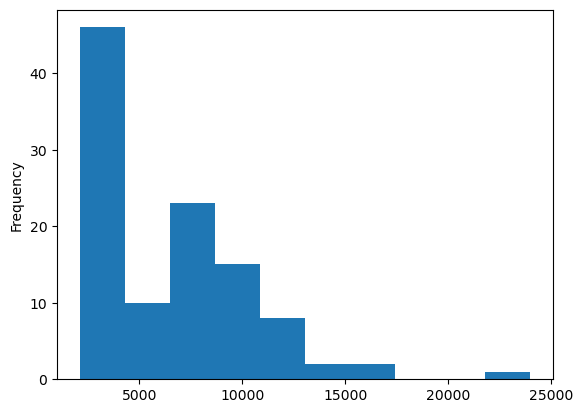

In [49]:
df.SALARY.plot(kind='hist')

In [35]:
# drop
import cx_Oracle
conn = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")
cs = conn.cursor()
sql = "drop table sample1"
cs.execute(sql)
cs.close()
conn.commit()
conn.close()

In [36]:
# create
import cx_Oracle
conn = cx_Oracle.connect("c##hr","hr","localhost:1521/xe")
cs = conn.cursor()
sql = "create table sample1(id varchar2(10), score number)"
cs.execute(sql)

In [ ]:
# insert
sql = "insert into sample1 (id,score) values (1,100)"
cs.execute(sql)
# conn.commit()

#### 바인드 변수
- 인덱스를 사용하여 데이터 시퀀스의 각 요소를 SQL 문에 바인딩

#### 바인드 변수의 장점:
- 보안: SQL 인젝션 공격을 방지할 수 있다. 바인드 변수를 사용하면 입력 데이터가 SQL 구문으로 해석되지 않고 단순한 값으로 처리된다.- 
- 성능: 동일한 SQL 명령어를 반복 실행할 때 SQL 문을 파싱하고 컴파일하는 시간을 절약할 수 있다
- 가독성: 코드를 보다 명확하게 하고 유지보수를 쉽게 할 있다.

In [37]:
# insert 여러개 입력
# :1과 :2는 바인딩 변수로, 나중에 값을 대체하여 사용
for i in range(10):
    sql = "insert into sample1 values(:1,:2)"
    cs.execute(sql,(i,100*i))
conn.commit()

In [38]:
cs.execute('select * from sample1')
# 쿼리 결과를 모두 가져와 res 변수에 저장
res = cs.fetchall()
df=pd.DataFrame(res)
df.head()

,0,1
0,0,0
1,1,100
2,2,200
3,3,300
4,4,400


In [44]:
# update
sql = "update sample1 set score = 50 where id = '0'"
cs.execute(sql)
cs.close()
conn.commit()
conn.close()